# 🔧 Prétraitement des Données pour la Classification de CV

## 📚 1. Importation des bibliothèques

In [16]:
# Manipulation de données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# NLP - Vectorisation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Gestion des warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ Bibliothèques importées avec succès")

✅ Bibliothèques importées avec succès


## 📂 2. Chargement des données nettoyées

In [17]:
# Charger le dataset nettoyé depuis l'étape précédente
file_path = "../data/processed/clean_cv_dataset.csv"

print("📂 Chargement du dataset nettoyé...")
dataset = pd.read_csv(file_path)

print(f"✅ Dataset chargé avec succès !")
print(f"📊 Nombre de CV : {len(dataset)}")
print(f"📋 Colonnes disponibles : {list(dataset.columns)}")

# Afficher les premières lignes
dataset.head()

📂 Chargement du dataset nettoyé...
✅ Dataset chargé avec succès !
📊 Nombre de CV : 9544
📋 Colonnes disponibles : ['clean_text', 'domain', 'experience_level', 'main_skills', 'resume_text']


,clean_text,domain,experience_level,main_skills,resume_text
0,big data analytics working database warehouse ...,IT & Data Science,Junior (1-2 ans),"Programming, Data & Analytics, Cloud & DevOps",Big data analytics working and database wareho...
1,fresher looking join data analyst junior data ...,IT & Data Science,Confirmé (5-10 ans),Data & Analytics,Fresher looking to join as a data analyst and ...
2,nan software development machine learning deep...,IT & Data Science,Intermédiaire (2-5 ans),"Programming, Data & Analytics, Cloud & DevOps,...","nan ['Software Development', 'Machine Learning..."
3,obtain position fast paced business office env...,IT & Data Science,Junior (1-2 ans),"Data & Analytics, Management & Soft Skills, De...",To obtain a position in a fast-paced business ...
4,professional accountant outstanding work ethic...,IT & Data Science,Senior (10+ ans),"Programming, Data & Analytics, Management & So...",Professional accountant with an outstanding wo...


## 🔍 3. Analyse des données nettoyées

In [18]:
# Informations sur le dataset
print("=" * 80)
print("INFORMATIONS SUR LE DATASET")
print("=" * 80)
dataset.info()

INFORMATIONS SUR LE DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   clean_text        9544 non-null   object
 1   domain            9544 non-null   object
 2   experience_level  9544 non-null   object
 3   main_skills       9544 non-null   object
 4   resume_text       9544 non-null   object
dtypes: object(5)
memory usage: 372.9+ KB


In [19]:
# Vérifier les valeurs manquantes
print("\n" + "=" * 80)
print("VALEURS MANQUANTES")
print("=" * 80)
print(dataset.isnull().sum())


VALEURS MANQUANTES
clean_text          0
domain              0
experience_level    0
main_skills         0
resume_text         0
dtype: int64


In [20]:
# Statistiques sur la longueur du texte nettoyé
print("\n" + "=" * 80)
print("STATISTIQUES SUR LE TEXTE NETTOYÉ")
print("=" * 80)

dataset['text_length'] = dataset['clean_text'].str.len()
dataset['word_count'] = dataset['clean_text'].str.split().str.len()

print(f"📏 Longueur moyenne du texte : {dataset['text_length'].mean():.0f} caractères")
print(f"📝 Nombre moyen de mots : {dataset['word_count'].mean():.0f} mots")
print(f"📏 Longueur min : {dataset['text_length'].min()} caractères")
print(f"📏 Longueur max : {dataset['text_length'].max()} caractères")

# Afficher la distribution
dataset[['text_length', 'word_count']].describe()


STATISTIQUES SUR LE TEXTE NETTOYÉ
📏 Longueur moyenne du texte : 1115 caractères
📝 Nombre moyen de mots : 135 mots
📏 Longueur min : 244 caractères
📏 Longueur max : 4062 caractères


,text_length,word_count
count,9544.000000,9544.000000
mean,1114.805427,135.102682
std,480.247648,57.714826
min,244.000000,29.000000
25%,764.000000,93.000000
50%,993.000000,122.000000
75%,1364.000000,164.000000
max,4062.000000,474.000000


## 🏷️ 4. Encodage des labels (Variables cibles)

In [21]:
# Les modèles de ML nécessitent des labels numériques
# Nous allons encoder nos 3 variables cibles : domain, experience_level, main_skills

print("🏷️ Encodage des labels...")

# Créer des encodeurs pour chaque label
encoder_domain = LabelEncoder()
encoder_experience = LabelEncoder()
encoder_skills = LabelEncoder()

# Encoder les labels
dataset['domain_encoded'] = encoder_domain.fit_transform(dataset['domain'])
dataset['experience_encoded'] = encoder_experience.fit_transform(dataset['experience_level'])
dataset['skills_encoded'] = encoder_skills.fit_transform(dataset['main_skills'])

print("✅ Labels encodés avec succès !")
print("\n" + "=" * 80)
print("MAPPING DES LABELS ENCODÉS")
print("=" * 80)

# Afficher le mapping pour le domaine
print("\n🏢 DOMAINE PROFESSIONNEL :")
domain_mapping = dict(zip(encoder_domain.classes_, encoder_domain.transform(encoder_domain.classes_)))
for label, code in sorted(domain_mapping.items(), key=lambda x: x[1]):
    print(f"   {code} → {label}")

# Afficher le mapping pour l'expérience
print("\n📊 NIVEAU D'EXPÉRIENCE :")
exp_mapping = dict(zip(encoder_experience.classes_, encoder_experience.transform(encoder_experience.classes_)))
for label, code in sorted(exp_mapping.items(), key=lambda x: x[1]):
    print(f"   {code} → {label}")

# Afficher un aperçu
print("\n📋 Aperçu des labels encodés :")
dataset[['domain', 'domain_encoded', 'experience_level', 'experience_encoded']].head()

🏷️ Encodage des labels...
✅ Labels encodés avec succès !

MAPPING DES LABELS ENCODÉS

🏢 DOMAINE PROFESSIONNEL :
   0 → Business & Management
   1 → Design & Creative
   2 → Human Resources
   3 → IT & Data Science
   4 → Marketing & Communication
   5 → Other
   6 → Sales & Business Development
   7 → Support & Customer Service
   8 → Web Development

📊 NIVEAU D'EXPÉRIENCE :
   0 → Confirmé (5-10 ans)
   1 → Débutant (0-1 an)
   2 → Intermédiaire (2-5 ans)
   3 → Junior (1-2 ans)
   4 → Senior (10+ ans)

📋 Aperçu des labels encodés :


,domain,domain_encoded,experience_level,experience_encoded
0,IT & Data Science,3,Junior (1-2 ans),3
1,IT & Data Science,3,Confirmé (5-10 ans),0
2,IT & Data Science,3,Intermédiaire (2-5 ans),2
3,IT & Data Science,3,Junior (1-2 ans),3
4,IT & Data Science,3,Senior (10+ ans),4


## 🔢 5. Vectorisation TF-IDF du texte

In [22]:
"""
TF-IDF (Term Frequency-Inverse Document Frequency) :
- Transforme le texte en vecteurs numériques
- Donne plus d'importance aux mots rares et discriminants
- Réduit l'importance des mots très fréquents

Paramètres utilisés :
- max_features : nombre maximum de mots à considérer
- min_df : fréquence minimale d'un mot dans les documents
- max_df : fréquence maximale d'un mot dans les documents
- ngram_range : considère les mots seuls et les paires de mots
"""

print("🔢 Création du vectoriseur TF-IDF...")

# Créer le vectoriseur TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,        # Garder les 5000 mots les plus importants
    min_df=2,                 # Un mot doit apparaître dans au moins 2 documents
    max_df=0.8,               # Ignorer les mots qui apparaissent dans plus de 80% des documents
    ngram_range=(1, 2),       # Considérer les mots seuls (1-gram) et les paires (2-gram)
    lowercase=True,           # Convertir en minuscules
    strip_accents='unicode'   # Supprimer les accents
)

print("🔄 Application de TF-IDF sur le texte nettoyé...")
print("⏳ Cette opération peut prendre quelques minutes...")

# Appliquer TF-IDF sur le texte nettoyé
X_tfidf = tfidf_vectorizer.fit_transform(dataset['clean_text'])

print(f"✅ Vectorisation TF-IDF terminée !")
print(f"📊 Dimensions de la matrice TF-IDF : {X_tfidf.shape}")
print(f"   - Nombre de documents (CV) : {X_tfidf.shape[0]}")
print(f"   - Nombre de features (mots) : {X_tfidf.shape[1]}")
print(f"💾 Taille mémoire approximative : {X_tfidf.data.nbytes / (1024**2):.2f} MB")

🔢 Création du vectoriseur TF-IDF...
🔄 Application de TF-IDF sur le texte nettoyé...
⏳ Cette opération peut prendre quelques minutes...
✅ Vectorisation TF-IDF terminée !
📊 Dimensions de la matrice TF-IDF : (9544, 5000)
   - Nombre de documents (CV) : 9544
   - Nombre de features (mots) : 5000
💾 Taille mémoire approximative : 9.28 MB


In [23]:
# Afficher les mots les plus importants (top 20)
print("\n" + "=" * 80)
print("TOP 20 DES MOTS LES PLUS IMPORTANTS (TF-IDF)")
print("=" * 80)

# Calculer la moyenne TF-IDF pour chaque mot
tfidf_mean = np.asarray(X_tfidf.mean(axis=0)).flatten()
feature_names = tfidf_vectorizer.get_feature_names_out()

# Créer un DataFrame pour visualiser
tfidf_df = pd.DataFrame({
    'mot': feature_names,
    'score_tfidf': tfidf_mean
}).sort_values('score_tfidf', ascending=False)

print("\n📊 Top 20 des mots les plus significatifs :")
print(tfidf_df.head(20))


TOP 20 DES MOTS LES PLUS IMPORTANTS (TF-IDF)

📊 Top 20 des mots les plus significatifs :
                   mot  score_tfidf
1029              data     0.055043
2498        management     0.044486
821            company     0.039812
2888              name     0.039214
823       company name     0.039097
1184       development     0.036026
2313          learning     0.035789
168           analysis     0.033541
1143            design     0.031502
4151          software     0.029773
2892      name company     0.029440
4388           support     0.028412
2454  machine learning     0.026636
2453           machine     0.026597
4423            system     0.025790
762      collaboration     0.025694
2473       maintenance     0.024200
3021              none     0.022264
2646         marketing     0.021679
4712   troubleshooting     0.021554


## 📊 6. Visualisation de la distribution des features

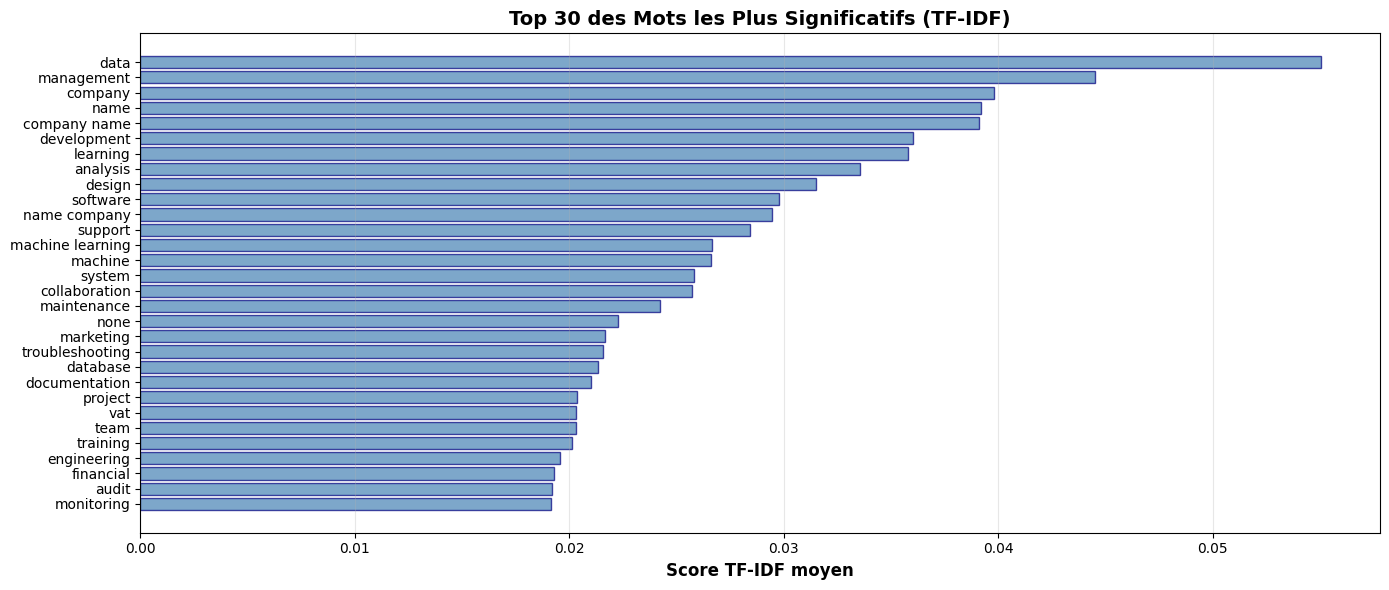

📈 Les mots avec le score TF-IDF le plus élevé sont les plus discriminants pour la classification


In [24]:
# Visualisation de la distribution TF-IDF
plt.figure(figsize=(14, 6))

# Top 30 mots par score TF-IDF moyen
top_30_words = tfidf_df.head(30)
plt.barh(range(len(top_30_words)), top_30_words['score_tfidf'], color='steelblue', edgecolor='navy', alpha=0.7)
plt.yticks(range(len(top_30_words)), top_30_words['mot'])
plt.xlabel('Score TF-IDF moyen', fontsize=12, fontweight='bold')
plt.title('Top 30 des Mots les Plus Significatifs (TF-IDF)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("📈 Les mots avec le score TF-IDF le plus élevé sont les plus discriminants pour la classification")

## 🧹 7. Nettoyage des classes rares pour les compétences

In [25]:
# Analyser la distribution des classes de compétences
print("🔍 Analyse de la distribution des classes de compétences...")
print("=" * 80)

skills_distribution = dataset['main_skills'].value_counts()
print(f"\n📊 Nombre total de combinaisons de compétences : {len(skills_distribution)}")
print(f"📊 Distribution des compétences (top 20) :")
print(skills_distribution.head(20))

# Identifier les classes avec moins de 2 exemples (problème pour stratify)
rare_classes = skills_distribution[skills_distribution < 2].index.tolist()
print(f"\n⚠️ Classes rares (< 2 exemples) : {len(rare_classes)}")

if len(rare_classes) > 0:
    print(f"   Ces classes seront regroupées dans 'Other'")
    if len(rare_classes) <= 20:
        print(f"   Classes concernées : {rare_classes}")
    else:
        print(f"   Classes concernées (10 premières) : {rare_classes[:10]}...")
    
    # Option : Remplacer les classes rares par "Other"
    dataset['main_skills_cleaned'] = dataset['main_skills'].apply(
        lambda x: 'Other' if x in rare_classes else x
    )
    
    # Ré-encoder après nettoyage
    from sklearn.preprocessing import LabelEncoder
    encoder_skills_cleaned = LabelEncoder()
    dataset['skills_encoded_cleaned'] = encoder_skills_cleaned.fit_transform(dataset['main_skills_cleaned'])
    
    print(f"\n✅ Classes nettoyées et regroupées !")
    print(f"📊 Nouvelles classes uniques : {len(dataset['main_skills_cleaned'].unique())}")
    print(f"\n📊 Nouvelle distribution (top 15) :")
    print(dataset['main_skills_cleaned'].value_counts().head(15))
else:
    print(f"\n✅ Aucune classe rare détectée, toutes les classes ont au moins 2 exemples")
    dataset['skills_encoded_cleaned'] = dataset['skills_encoded']
    encoder_skills_cleaned = encoder_skills

🔍 Analyse de la distribution des classes de compétences...

📊 Nombre total de combinaisons de compétences : 142
📊 Distribution des compétences (top 20) :
main_skills
Programming, Data & Analytics                                                                                            765
Programming, Data & Analytics, Management & Soft Skills, Design & Creative                                               610
Programming, Data & Analytics, Management & Soft Skills                                                                  512
Programming, Data & Analytics, Management & Soft Skills, Design & Creative, Finance & Accounting                         450
Programming, Data & Analytics, Management & Soft Skills, Marketing & Digital, Design & Creative, Finance & Accounting    335
Data & Analytics, Management & Soft Skills, Design & Creative, Finance & Accounting                                      307
Programming, Data & Analytics, Web Development, Management & Soft Skills, Design & C

## 🎯 7. Préparation des ensembles Train/Test pour chaque tâche de classification

In [26]:
"""
Nous allons créer 3 modèles de classification :
1. Classification du DOMAINE PROFESSIONNEL
2. Classification du NIVEAU D'EXPÉRIENCE
3. Classification des COMPÉTENCES PRINCIPALES

Pour chaque modèle, nous séparons les données en :
- 80% pour l'entraînement (Train)
- 20% pour le test (Test)
"""

print("🎯 Séparation des données en ensembles Train/Test...")
print("=" * 80)

# Définir les features (X) et les labels (y)
X = X_tfidf  # Matrice TF-IDF

# ====== MODÈLE 1 : CLASSIFICATION DU DOMAINE ======
y_domain = dataset['domain_encoded']

X_train_domain, X_test_domain, y_train_domain, y_test_domain = train_test_split(
    X, y_domain, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_domain  # Garantit une répartition équilibrée des classes
)

print("\n🏢 MODÈLE 1 : CLASSIFICATION DU DOMAINE PROFESSIONNEL")
print(f"   📊 Ensemble d'entraînement : {X_train_domain.shape[0]} CV")
print(f"   📊 Ensemble de test : {X_test_domain.shape[0]} CV")
print(f"   🎯 Nombre de classes : {len(np.unique(y_domain))}")

# ====== MODÈLE 2 : CLASSIFICATION DU NIVEAU D'EXPÉRIENCE ======
y_experience = dataset['experience_encoded']

X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
    X, y_experience, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_experience
)

print("\n📊 MODÈLE 2 : CLASSIFICATION DU NIVEAU D'EXPÉRIENCE")
print(f"   📊 Ensemble d'entraînement : {X_train_exp.shape[0]} CV")
print(f"   📊 Ensemble de test : {X_test_exp.shape[0]} CV")
print(f"   🎯 Nombre de classes : {len(np.unique(y_experience))}")

# ====== MODÈLE 3 : CLASSIFICATION DES COMPÉTENCES ======
# ⚠️ IMPORTANT : Utiliser skills_encoded_cleaned au lieu de skills_encoded
# pour éviter les classes avec un seul exemple qui causent une erreur de stratification
y_skills = dataset['skills_encoded_cleaned']

X_train_skills, X_test_skills, y_train_skills, y_test_skills = train_test_split(
    X, y_skills, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_skills  # Fonctionne car toutes les classes ont >= 2 exemples
)

print("\n🎯 MODÈLE 3 : CLASSIFICATION DES COMPÉTENCES PRINCIPALES")
print(f"   📊 Ensemble d'entraînement : {X_train_skills.shape[0]} CV")
print(f"   📊 Ensemble de test : {X_test_skills.shape[0]} CV")
print(f"   🎯 Nombre de classes : {len(np.unique(y_skills))}")

print("\n✅ Séparation des données terminée avec succès !")

🎯 Séparation des données en ensembles Train/Test...

🏢 MODÈLE 1 : CLASSIFICATION DU DOMAINE PROFESSIONNEL
   📊 Ensemble d'entraînement : 7635 CV
   📊 Ensemble de test : 1909 CV
   🎯 Nombre de classes : 9

📊 MODÈLE 2 : CLASSIFICATION DU NIVEAU D'EXPÉRIENCE
   📊 Ensemble d'entraînement : 7635 CV
   📊 Ensemble de test : 1909 CV
   🎯 Nombre de classes : 5

🎯 MODÈLE 3 : CLASSIFICATION DES COMPÉTENCES PRINCIPALES
   📊 Ensemble d'entraînement : 7635 CV
   📊 Ensemble de test : 1909 CV
   🎯 Nombre de classes : 137

✅ Séparation des données terminée avec succès !


## 📈 8. Visualisation de la distribution des classes dans Train/Test

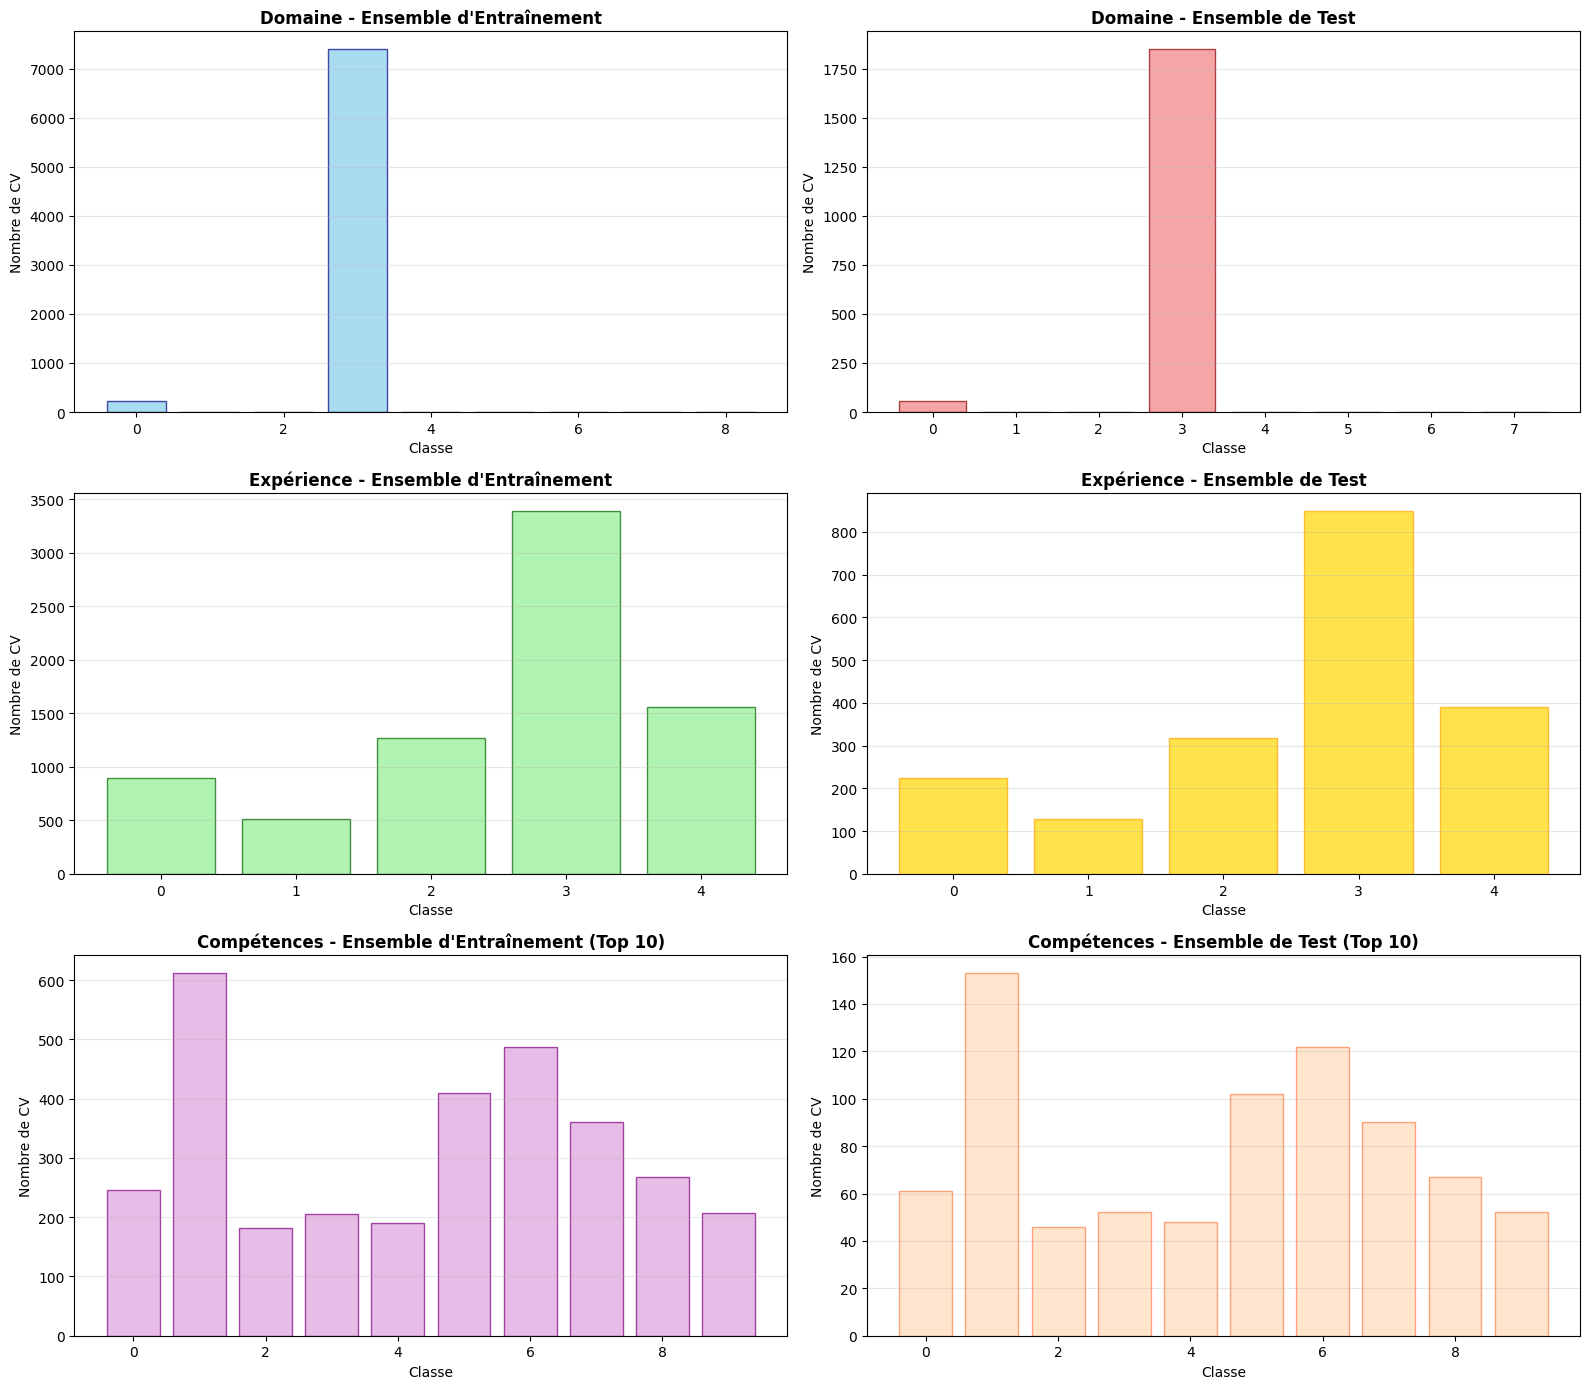

📊 Les distributions sont équilibrées entre Train et Test grâce au paramètre 'stratify'


In [27]:
# Visualiser la distribution des classes pour chaque modèle
fig, axes = plt.subplots(3, 2, figsize=(16, 14))

# ====== DOMAINE ======
# Train
train_domain_dist = pd.Series(y_train_domain).value_counts().sort_index()
axes[0, 0].bar(train_domain_dist.index, train_domain_dist.values, color='skyblue', edgecolor='navy', alpha=0.7)
axes[0, 0].set_title('Domaine - Ensemble d\'Entraînement', fontweight='bold')
axes[0, 0].set_xlabel('Classe')
axes[0, 0].set_ylabel('Nombre de CV')
axes[0, 0].grid(axis='y', alpha=0.3)

# Test
test_domain_dist = pd.Series(y_test_domain).value_counts().sort_index()
axes[0, 1].bar(test_domain_dist.index, test_domain_dist.values, color='lightcoral', edgecolor='darkred', alpha=0.7)
axes[0, 1].set_title('Domaine - Ensemble de Test', fontweight='bold')
axes[0, 1].set_xlabel('Classe')
axes[0, 1].set_ylabel('Nombre de CV')
axes[0, 1].grid(axis='y', alpha=0.3)

# ====== EXPÉRIENCE ======
# Train
train_exp_dist = pd.Series(y_train_exp).value_counts().sort_index()
axes[1, 0].bar(train_exp_dist.index, train_exp_dist.values, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
axes[1, 0].set_title('Expérience - Ensemble d\'Entraînement', fontweight='bold')
axes[1, 0].set_xlabel('Classe')
axes[1, 0].set_ylabel('Nombre de CV')
axes[1, 0].grid(axis='y', alpha=0.3)

# Test
test_exp_dist = pd.Series(y_test_exp).value_counts().sort_index()
axes[1, 1].bar(test_exp_dist.index, test_exp_dist.values, color='gold', edgecolor='orange', alpha=0.7)
axes[1, 1].set_title('Expérience - Ensemble de Test', fontweight='bold')
axes[1, 1].set_xlabel('Classe')
axes[1, 1].set_ylabel('Nombre de CV')
axes[1, 1].grid(axis='y', alpha=0.3)

# ====== COMPÉTENCES ======
# Train (top 10 classes)
train_skills_dist = pd.Series(y_train_skills).value_counts().head(10).sort_index()
axes[2, 0].bar(range(len(train_skills_dist)), train_skills_dist.values, color='plum', edgecolor='purple', alpha=0.7)
axes[2, 0].set_title('Compétences - Ensemble d\'Entraînement (Top 10)', fontweight='bold')
axes[2, 0].set_xlabel('Classe')
axes[2, 0].set_ylabel('Nombre de CV')
axes[2, 0].grid(axis='y', alpha=0.3)

# Test (top 10 classes)
test_skills_dist = pd.Series(y_test_skills).value_counts().head(10).sort_index()
axes[2, 1].bar(range(len(test_skills_dist)), test_skills_dist.values, color='peachpuff', edgecolor='coral', alpha=0.7)
axes[2, 1].set_title('Compétences - Ensemble de Test (Top 10)', fontweight='bold')
axes[2, 1].set_xlabel('Classe')
axes[2, 1].set_ylabel('Nombre de CV')
axes[2, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Les distributions sont équilibrées entre Train et Test grâce au paramètre 'stratify'")

## 💾 9. Sauvegarde des objets prétraités

In [28]:
# Sauvegarder le vectoriseur TF-IDF et les encodeurs pour une utilisation future
import joblib

print("💾 Sauvegarde des objets de prétraitement...")

# Sauvegarder le vectoriseur TF-IDF
joblib.dump(tfidf_vectorizer, '../models/tfidf_vectorizer.joblib')
print("   ✅ Vectoriseur TF-IDF sauvegardé")

# Sauvegarder les encodeurs de labels
joblib.dump(encoder_domain, '../models/encoder_domain.joblib')
print("   ✅ Encodeur du domaine sauvegardé")

joblib.dump(encoder_experience, '../models/encoder_experience.joblib')
print("   ✅ Encodeur de l'expérience sauvegardé")

joblib.dump(encoder_skills_cleaned, '../models/encoder_skills.joblib')
print("   ✅ Encodeur des compétences (nettoyé) sauvegardé")

print("\n✅ Tous les objets de prétraitement ont été sauvegardés dans le dossier 'models/'")

💾 Sauvegarde des objets de prétraitement...
   ✅ Vectoriseur TF-IDF sauvegardé
   ✅ Encodeur du domaine sauvegardé
   ✅ Encodeur de l'expérience sauvegardé
   ✅ Encodeur des compétences (nettoyé) sauvegardé

✅ Tous les objets de prétraitement ont été sauvegardés dans le dossier 'models/'


In [29]:
# Sauvegarder les ensembles Train/Test pour l'entraînement des modèles
print("💾 Sauvegarde des ensembles Train/Test...")

# Créer un dictionnaire avec toutes les données
preprocessing_data = {
    # Domaine
    'X_train_domain': X_train_domain,
    'X_test_domain': X_test_domain,
    'y_train_domain': y_train_domain,
    'y_test_domain': y_test_domain,
    
    # Expérience
    'X_train_exp': X_train_exp,
    'X_test_exp': X_test_exp,
    'y_train_exp': y_train_exp,
    'y_test_exp': y_test_exp,
    
    # Compétences
    'X_train_skills': X_train_skills,
    'X_test_skills': X_test_skills,
    'y_train_skills': y_train_skills,
    'y_test_skills': y_test_skills
}

# Sauvegarder le dictionnaire
joblib.dump(preprocessing_data, '../models/preprocessing_data.joblib')

print("✅ Ensembles Train/Test sauvegardés dans 'models/preprocessing_data.joblib'")
print(f"💽 Taille du fichier : {preprocessing_data['X_train_domain'].data.nbytes / (1024**2):.2f} MB (approximatif)")

💾 Sauvegarde des ensembles Train/Test...
✅ Ensembles Train/Test sauvegardés dans 'models/preprocessing_data.joblib'
💽 Taille du fichier : 7.43 MB (approximatif)


## 📋 10. Résumé du prétraitement

In [30]:
# Afficher un résumé complet du prétraitement
print("\n" + "=" * 80)
print("✅ PRÉTRAITEMENT DES DONNÉES TERMINÉ AVEC SUCCÈS !")
print("=" * 80)

print("\n📊 RÉSUMÉ DES OPÉRATIONS :")
print(f"   ✓ Dataset nettoyé chargé : {len(dataset)} CV")
print(f"   ✓ Vectorisation TF-IDF : {X_tfidf.shape[1]} features")
print(f"   ✓ Labels encodés : 3 variables cibles (domain, experience, skills)")
print(f"   ✓ Split Train/Test : 80% / 20%")

print("\n🎯 MODÈLES À ENTRAÎNER :")
print(f"   1. Classification du Domaine : {len(np.unique(y_domain))} classes")
print(f"   2. Classification de l'Expérience : {len(np.unique(y_experience))} classes")
print(f"   3. Classification des Compétences : {len(np.unique(y_skills))} classes")

print("\n💾 FICHIERS SAUVEGARDÉS :")
print("   - tfidf_vectorizer.joblib")
print("   - encoder_domain.joblib")
print("   - encoder_experience.joblib")
print("   - encoder_skills.joblib")
print("   - preprocessing_data.joblib")

print("\n📂 DONNÉES PRÊTES POUR L'ENTRAÎNEMENT :")
print(f"   - X_train : {X_train_domain.shape}")
print(f"   - X_test : {X_test_domain.shape}")

print("\n🚀 PROCHAINE ÉTAPE :")
print("   → Notebook 09_train_model.ipynb : Entraînement des modèles de classification")

print("\n" + "=" * 80)


✅ PRÉTRAITEMENT DES DONNÉES TERMINÉ AVEC SUCCÈS !

📊 RÉSUMÉ DES OPÉRATIONS :
   ✓ Dataset nettoyé chargé : 9544 CV
   ✓ Vectorisation TF-IDF : 5000 features
   ✓ Labels encodés : 3 variables cibles (domain, experience, skills)
   ✓ Split Train/Test : 80% / 20%

🎯 MODÈLES À ENTRAÎNER :
   1. Classification du Domaine : 9 classes
   2. Classification de l'Expérience : 5 classes
   3. Classification des Compétences : 137 classes

💾 FICHIERS SAUVEGARDÉS :
   - tfidf_vectorizer.joblib
   - encoder_domain.joblib
   - encoder_experience.joblib
   - encoder_skills.joblib
   - preprocessing_data.joblib

📂 DONNÉES PRÊTES POUR L'ENTRAÎNEMENT :
   - X_train : (7635, 5000)
   - X_test : (1909, 5000)

🚀 PROCHAINE ÉTAPE :
   → Notebook 09_train_model.ipynb : Entraînement des modèles de classification

